In [1]:
from ActivePyTools.visualizing_tools import *
from OldPyScripts.custom_algorithms import *

In [623]:
from ActivePyTools.grab_data import eval_object_columns
import cv2
import pandas as pd

crop_path = './docs/crop_pics/google/'
pic_name = 'Bookshelves_4.jpg'
temp_df = pd.read_csv('./data/Bookshelves_4_df.csv')
evaled_df = eval_object_columns(temp_df)

In [624]:
evaled_df

,txt,confidence,vertices,boundBox,slopes,font,word_len,direction,center_point,crop_idx,Left,Top
0,med,100,"[(101, 75), (102, 99), (89, 99), (88, 75)]","{'Width': 14, 'Height': 24, 'Left': 88, 'Top':...","(-24.0, 0.0, -24.0, -0.0)",13.000000,24.020824,vertical,"(95.0, 87.0)","(0, 0)",88,75
1,all,100,"[(102, 106), (102, 124), (88, 124), (88, 106)]","{'Width': 14, 'Height': 18, 'Left': 88, 'Top':...","(1000.0, 0.0, 1000.0, -0.0)",14.000000,18.000000,vertical,"(95.0, 115.0)","(0, 0)",88,106
2,the,100,"[(102, 126), (102, 146), (89, 146), (89, 126)]","{'Width': 13, 'Height': 20, 'Left': 89, 'Top':...","(1000.0, 0.0, 1000.0, -0.0)",13.000000,20.000000,vertical,"(95.5, 136.0)","(0, 0)",89,126
3,bright,100,"[(103, 152), (104, 191), (90, 191), (89, 152)]","{'Width': 15, 'Height': 39, 'Left': 89, 'Top':...","(-39.0, 0.0, -39.0, -0.0)",14.000000,39.012818,vertical,"(96.5, 171.5)","(0, 0)",89,152
4,진,100,"[(110, 353), (111, 380), (90, 381), (89, 354)]","{'Width': 22, 'Height': 28, 'Left': 89, 'Top':...","(-27.0, 0.048, -27.0, 0.048)",21.023796,27.018512,vertical,"(100.0, 367.0)","(0, 0)",89,353
...,...,...,...,...,...,...,...,...,...,...,...,...
446,PARTY,100,"[(420, 259), (473, 254), (474, 267), (421, 272)]","{'Width': 54, 'Height': 18, 'Left': 420, 'Top'...","(0.094, -13.0, 0.094, -13.0)",13.038405,53.235327,horizontal,"(447.0, 263.0)","(4, 1)",420,254
447,UGLYDOLL,100,"[(429, 75), (544, 59), (547, 81), (432, 98)]","{'Width': 118, 'Height': 39, 'Left': 429, 'Top...","(0.139, -7.333, 0.148, -7.667)",22.699215,116.178720,horizontal,"(488.0, 78.25)","(4, 1)",429,59
448,GOODIES,100,"[(441, 185), (523, 169), (526, 187), (444, 203)]","{'Width': 85, 'Height': 34, 'Left': 441, 'Top'...","(0.195, -6.0, 0.195, -6.0)",18.248288,83.546394,horizontal,"(483.5, 186.0)","(4, 1)",441,169
449,IN,100,"[(453, 160), (496, 151), (500, 171), (457, 181)]","{'Width': 47, 'Height': 30, 'Left': 453, 'Top'...","(0.209, -5.0, 0.233, -5.25)",20.886818,44.039623,horizontal,"(476.5, 165.75)","(4, 1)",453,151


In [310]:
def draw_text_on_image(text_row: pd.Series, image, padding: int = 10):
    vertices = text_row.vertices
    x_coords, y_coords = zip(*vertices)

    min_x = max(int(min(x_coords) - padding), 0)
    max_x = min(int(max(x_coords) + padding), image.shape[1])
    min_y = max(int(min(y_coords) - padding), 0)
    max_y = min(int(max(y_coords) + padding), image.shape[0])
    # 
    # print(vertices)
    # print(f"{min_x}, {max_x}; {min_y}, {max_y}")
    # print(image.shape)

    cropped_image = image[min_y:max_y, min_x:max_x]

    fig, ax = plt.subplots()
    ax.imshow(cropped_image, extent=[min_x, max_x, min_y, max_y])

    ax.add_patch(draw_rectangle(get_text_data(text_row), color='red'))

    ax.set_xlim(min_x, max_x)
    ax.set_ylim(min_y, max_y)

    ax.legend()
    plt.show()

In [985]:
id = 358

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


450
BOX


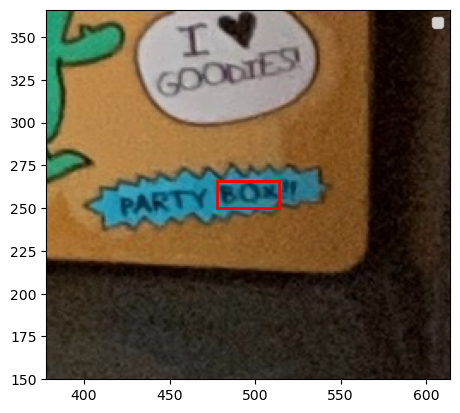

In [1084]:
id += 1
print(id)
text_row = evaled_df.iloc[id]
print(text_row.txt)
row, col = text_row.crop_idx
img_path = crop_path + pic_name + '_' + str( row) + '_' + str(col) +'.jpg'

draw_text_on_image(text_row, cv2.imread(img_path), padding=100)

In [1079]:
import difflib

difflib.SequenceMatcher(None, 'eautiful', 'beautiful').ratio()

0.9411764705882353

In [11]:
from ActivePyTools.utils import select_slope

def add_lines_to_image(line_params, image):
    """
    Adds two lines to an existing matplotlib plot based on their slopes and y-intercepts.

    Parameters:
    line_params (list of tuples): A list containing tuples where each tuple is (slope, y-intercept) for a line.
    y_range (tuple): A tuple (y_min, y_max) defining the range of y-values to consider for plotting the lines.
    """
    plt.imshow(image)
    height, width = image.shape[:2]
    x_values = np.linspace(0, width, num=width)

    for slope, intercept in line_params:
        y_values = slope * (x_values-intercept[0]) + intercept[1]  # Calculate y-values based on the line equation
        plt.plot(x_values, y_values, linewidth=1)  # Plot the line

    plt.xlim([0, width])
    plt.ylim([height, 0])


def plot_all_vertical_lines(img, df):
    height, width, _ = img.shape
    plt.figure(figsize=(18, 12))
    line_params_list = []
    txt_list = []
    for t_idx, t in df.iterrows():
        # t_vertices = [(x, height-y) for x, y in t.vertices]
        # slope = select_slope(t.slopes, t.direction)
        # print(f'vertices: {t.vertices}, slope: {slope}')
        # line_params = collapse_area(t_vertices, None, slope, for_plot=True)
        if "808" in t.txt:
            continue
        slope = select_slope(t.slopes, t.direction)
        if abs(slope) > 20:
            continue
        extreme_vertices = find_extreme_vertices(t.vertices)
        extreme_vertices = [(x, -y) for (x, y) in extreme_vertices]
        line_params = [(slope, extreme_vertices[0]), (slope, extreme_vertices[1])]
        # line_params = [(x, height-y) for x, y in line_params]
        line_params_list.extend(line_params)
        txt_list.append(t.txt)
    print(line_params_list)
    print(txt_list)
    add_lines_to_image(line_params_list, img)
    plt.title('Plot with Linear Equations')
    plt.xlabel('X Axis')
    plt.ylabel('Y Axis')

    # Display the plot
    plt.show()

[(3.832, (0, 187)), (3.832, (0, 219)), (2.694, (586, 276)), (2.694, (584, 291)), (2.515, (624, 281)), (2.515, (622, 295)), (7.184, (642, 1175)), (7.184, (641, 1195)), (4.67, (1831, 1207)), (4.67, (1830, 1220)), (5.388, (2037, 1212)), (5.388, (2036, 1227)), (5.747, (2144, 1193)), (5.747, (2143, 1209)), (5.388, (2852, 1215)), (5.388, (2851, 1230)), (5.388, (2943, 1221)), (5.388, (2942, 1236)), (4.311, (2987, 1202)), (4.311, (2986, 1214)), (5.029, (3036, 1245)), (5.029, (3035, 1259)), (2.227, (3068, 1144)), (2.227, (3064, 1175)), (5.388, (3065, 1197)), (5.388, (3064, 1212)), (6.466, (3066, 1179)), (6.466, (3065, 1197)), (2.227, (3144, 1154)), (2.227, (3140, 1185)), (4.67, (3143, 1229)), (4.67, (3142, 1243)), (7.903, (3149, 1127)), (7.903, (3148, 1149)), (4.67, (3149, 1205)), (4.67, (3148, 1218)), (4.311, (3237, 1232)), (4.311, (3236, 1244)), (5.029, (3333, 1248)), (5.029, (3332, 1262)), (2.694, (3419, 1250)), (2.694, (3418, 1265)), (4.311, (3431, 405)), (4.311, (3434, 441)), (2.515, (3438

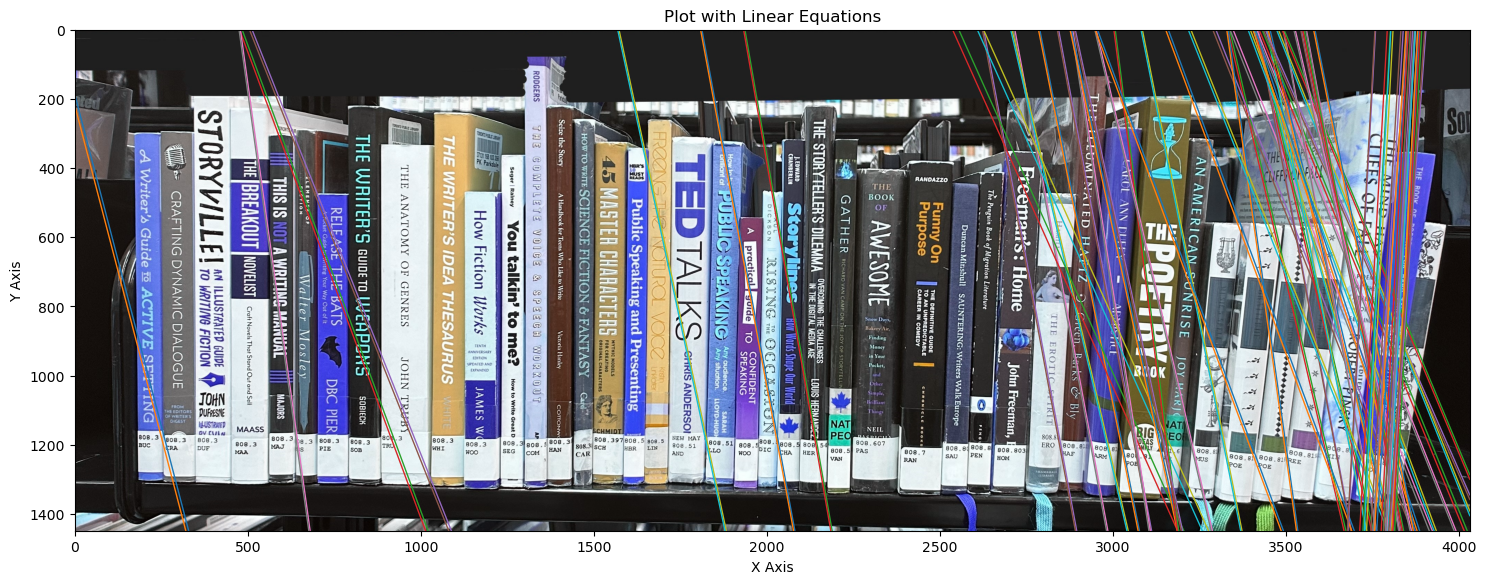

In [38]:
plot_all_vertical_lines(img, evaled_df)

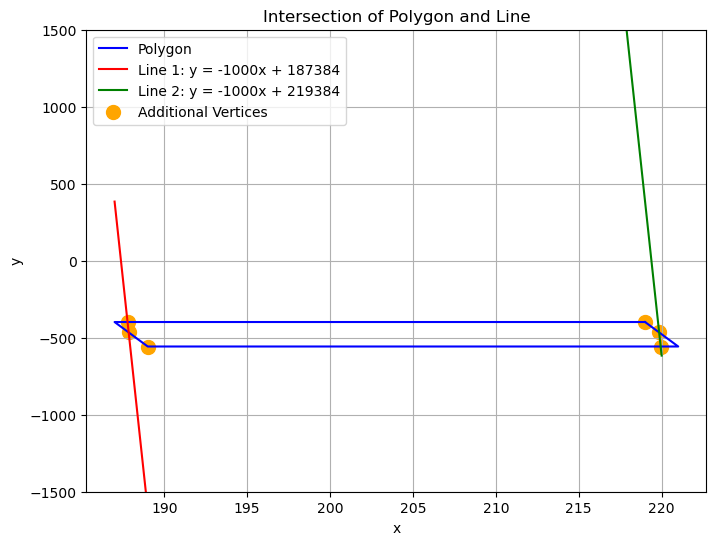

In [4]:
plot_box_intersect(vertices, slopes, (intercept1, intercept2), additional_vertices=new_vertices, padding=0, y_limits=(-1500, 1500))

In [2]:
from ActivePyTools.text_geometry_analysis_algorithm import *
import cv2

slopes = (-1000, -1000)
writers_mid_point = (204.0, 477.5)
A_mid_point = (203.0, 366.5)
writers_width = 32
writers_height = 159.012578
intercept = ((187, 384), (219, 384))
writers_vertices = [(219, 398), (221, 557), (189, 557), (187, 398)]
A_vertices = [(219, 349), (219, 384), (187, 384), (187, 349)]
img = cv2.imread('./pics/IMG_7940.jpeg')

In [3]:
type(img.shape)

tuple

5088.0


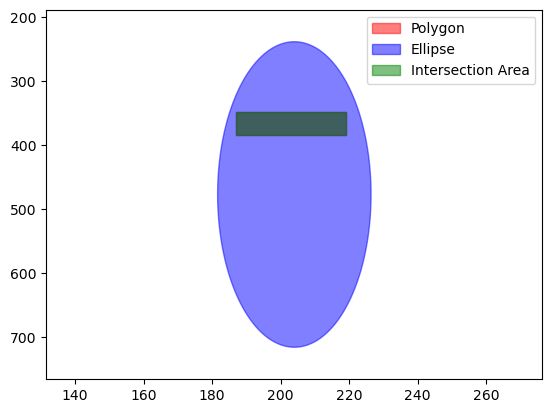

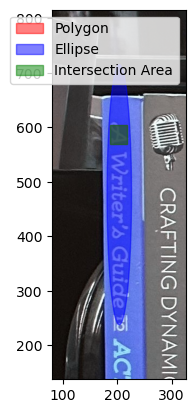

In [4]:
circ_inter_obj = CircularIntersection(writers_mid_point, writers_width* 0.7, writers_height * 1.5, slopes[0])
print(circ_inter_obj.intersection_area(writers_vertices))
circ_inter_obj.draw(A_vertices, padding=50)
circ_inter_obj.draw_on_image(A_vertices, img, padding=100)

4914.133499999999


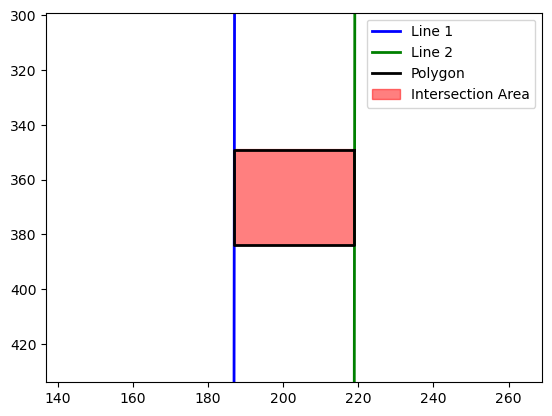

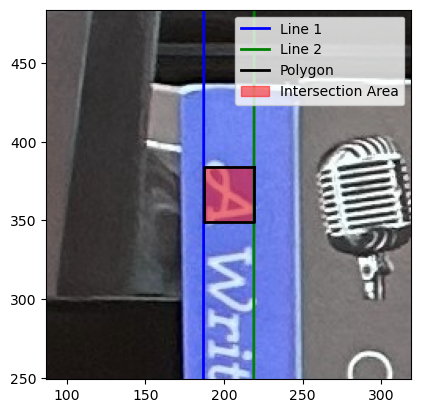

In [3]:
line_inter_obj = LinearIntersection.from_slopes_and_intercepts(slopes[0], intercept[0], slopes[1], intercept[1], img.shape)
print(line_inter_obj.intersection_area(writers_vertices))
line_inter_obj.draw(A_vertices, padding=50)
line_inter_obj.draw_on_image(A_vertices, img, padding=100)

0.0046708681640625915


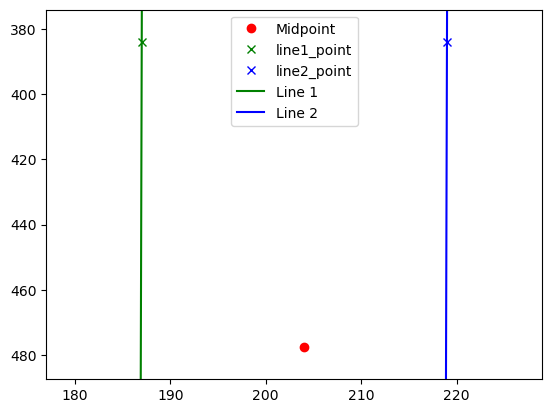

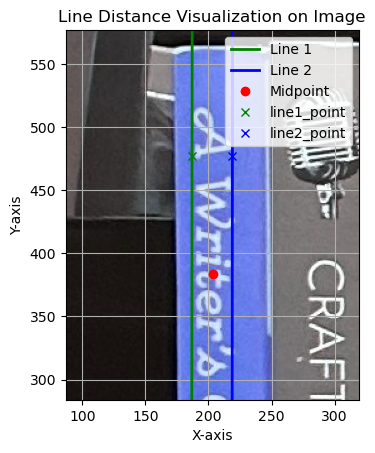

In [5]:
slopes = (-1000, -1000)
intercept = ((187, 384), (219, 384))

line_obj = LinearDist(intercept, slopes)
print(line_obj.calc_dist(writers_mid_point))
line_obj.draw(writers_mid_point, padding=10)
line_obj.draw_on_image(writers_mid_point, image=img, padding=100)

0.4680031533779142


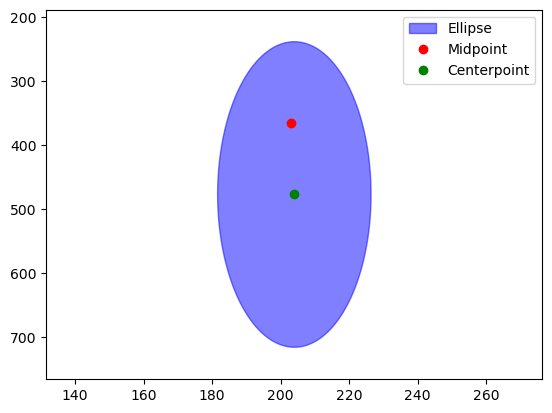

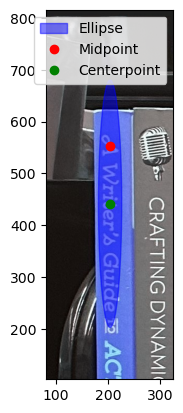

In [33]:
circ_dist_obj = CircularDist(writers_mid_point, writers_width* 0.7, writers_height * 1.5, slopes[0])
print(circ_dist_obj.calc_dist(A_mid_point))
circ_dist_obj.draw(A_mid_point, padding=50)
circ_dist_obj.draw_on_image(A_mid_point, img, padding=100)

NameError: name 'mid_point' is not defined

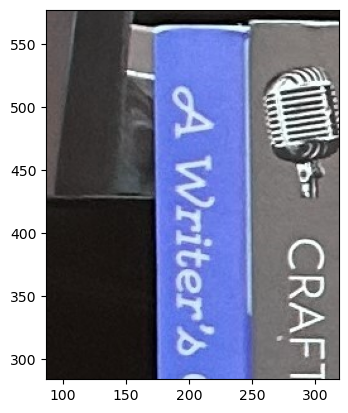

In [34]:
cropped_image = img[284: 577, 87:319]
h, w, _ = cropped_image.shape

def flip_y(y, h, y_min):
    return h - (y - y_min) + y_min

fig, ax = plt.subplots()
ax.imshow(cropped_image, extent=[87, 319, 284, 577])
ax.plot(writers_mid_point[0], flip_y(writers_mid_point[1], h, 284), 'ro', label='Midpoint')
for vertex in writers_vertices:
    ax.plot(vertex[0], flip_y(vertex[1], h, 284), 'yo')

In [36]:
writers_vertices

[(219, 398), (221, 557), (189, 557), (187, 398)]

In [55]:
cliffs_vertices = [(3780, 300), (3762, 448), (3722, 443), (3740, 295)]
img_ratio = img.shape[0] / img.shape[1]

def test2(vertices):
    slopes = []

    for i in range(len(vertices)):
        width = vertices[i][0] - vertices[(i + 1) % len(vertices)][0]
        height = vertices[(i + 1) % len(vertices)][1] - vertices[i][1]
        slope = float(1000) if width == 0 else height / width
        # Store the negative rounded slope
        slopes.append(-round(slope, 3))
    
    return tuple(slopes)

test2(cliffs_vertices)

(-8.222, 0.125, -8.222, 0.125)

In [50]:
from scipy.spatial import distance
import math
import numpy as np

def calculate_distance(point1, point2):
    """Calculate the Euclidean distance between two points in 2D space."""
    x1, y1 = point1
    x2, y2 = point2
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

def calculate_distance_np(point1, point2):
    """Calculate the Euclidean distance using NumPy for array operations."""
    point1 = np.array(point1)
    point2 = np.array(point2)
    return np.linalg.norm(point1 - point2)

In [54]:
from sklearn.metrics.pairwise import euclidean_distances

d1 = calculate_distance(cliffs_vertices[1], cliffs_vertices[2])
d2 = calculate_distance_np(cliffs_vertices[1], cliffs_vertices[2])
d3 = distance.euclidean(cliffs_vertices[1], cliffs_vertices[2])
d4 = euclidean_distances([cliffs_vertices[1]], [cliffs_vertices[2]])

d1, d2, d3, d4

(40.311288741492746,
 40.311288741492746,
 40.311288741492746,
 array([[40.31128874]]))

In [3]:
from collections import Counter

# Define a list of integers, potentially with repetitions
y_true = [1, 2, 2, 3, 4, 4, 4, 5, 6, 6, 6, 6]

# Use Counter to tally the occurrences of each integer in the list
counts = Counter(y_true)

# Display the result
print(counts)

Counter({6: 4, 4: 3, 2: 2, 1: 1, 3: 1, 5: 1})
